# Section0. Prepare necessary modules

In [ ]:
# The code has been tested in python version 3.13.7. You can try directly on your own python version first. If you meet problem, you can consider change your python version.

# Run the following code in your terminal (window: cmd, mac: iTerm) if you don't have these packages
# Do not run these code in the cell of jupternotebook !
conda install -n base ipykernel --update-deps --force-reinstall # install ipykernel
conda install numpy 
conda install pandas
conda install matplotlib
conda install scikit-learn
conda install seaborn

# Download torch
pip install torch torchvision torchmetrics
# When download torch, you have to make sure that you are using the correct version of pytorch for your environment. 
# Normally, you can just use: pip install 
# If you meet problem, please visit 'https://pytorch.org/get-started/locally/' and use their installation selector to get the exact command for your system configuration.

# Download CORnet
pip install git+https://github.com/dicarlolab/CORnet

# Section1. What is a convolution?


In a Convolutional Neural Network (CNN), convolution is the operation where a small filter (or kernel) slides over the input (like an image) and computes a weighted sum at each location.

*   Filter (Kernel): A small matrix of learnable weights.

*   Sliding (Convolution): The filter moves across the input step by step, multiplying its values with the overlapping input region and summing them up.

*   Output (Feature Map): The result highlights patterns such as edges, textures, or more abstract features, depending on the layer’s depth.

In short: **Convolution = pattern detector**. It allows CNNs to automatically learn useful features from data while keeping computations efficient.

You can run the code below to visualize the process of convolution. The Widget is from Neuromatch Academy [W2D2_Tutorial](https://deeplearning.neuromatch.io/tutorials/W2D2_ConvnetsAndDlThinking/student/W2D2_Tutorial1.html)

In [1]:
# @markdown * Run this cell to enable the widget!*

from IPython.display import HTML

id_html = 2
url = f'https://raw.githubusercontent.com/NeuromatchAcademy/course-content-dl/main/tutorials/W2D2_ConvnetsAndDlThinking/static/interactive_demo{id_html}.html'
run_demo = True  # @param {type:"boolean"}
if run_demo:
  display(HTML(url))

### Exercise 1. Try to implement the convolution2d function

In [2]:
import numpy as np

def convolution2d(image, kernel):
  """
  Convolves a 2D image matrix with a kernel matrix.

  Args:
    image: np.ndarray
      Image
    kernel: np.ndarray
      Kernel

  Returns:
    output: np.ndarray
      Output of convolution
  """

  # Get the height/width of the image, kernel, and output
  im_h, im_w = image.shape
  ker_h, ker_w = kernel.shape
  out_h = im_h - ker_h + 1
  out_w = im_w - ker_w + 1

  # Create an empty matrix in which to store the output
  output = np.zeros((out_h, out_w))

  # Iterate over the different positions at which to apply the kernel,
  # storing the results in the output matrix
  for out_row in range(out_h):
    for out_col in range(out_w):
      # Overlay the kernel on part of the image
      # (multiply each element of the kernel with some element of the image, then sum)
      # to determine the output of the matrix at a point
      current_product = 0
      for i in range(ker_h):
        for j in range(ker_w):
          ####################################################################
          # Fill in missing code below (...),
          ####################################################################
          current_product += ...

      output[out_row, out_col] = current_product

  return output

# Section 2. What is padding?


Before we go further, let's understand padding.

Padding (usually with zeros) keeps the output size the same as the input, which is often desired so we don’t lose information at the borders. If we don't want to lose that information, we will have to pad the image with some defaults (such as 0s) on the border. This process is, somewhat predictably, called padding.

You can run the code below to visualize the convolution with padding and stride:

Change the padding and stride and see how this affects the shape of the output. How does the padding need to be configured to maintain the shape of the input?

In [5]:
# @markdown *Run this cell to enable the widget!*

from IPython.display import HTML

id_html = 2.2
url = f'https://raw.githubusercontent.com/NeuromatchAcademy/course-content-dl/main/tutorials/W2D2_ConvnetsAndDlThinking/static/interactive_demo{id_html}.html'
run_demo = True # @param {type:"boolean"}
if run_demo:
  display(HTML(url))

# Section 3. Multiple channels and multiple filters

Previously, we only focus on 2d convolutions. However, real data (like images) usually has multiple channels for example, RGB image has 3 channels (Red, Green, Blue). In a CNN, we need the convolution filter spans all channels of the input at once to allows the network to combine information across channels.

Besides, each kernel learns to detect a different feature. One kernel may detect horizontal edges, another vertical edges, another color contrasts, etc. Applying many kernels in parallel gives multiple feature maps.For example, if you use 32 kernels, the output will have 32 feature maps (a richer representation).

You can run the codes below to visualize multiple channels and multple filters.

In [17]:
# @markdown *Run this cell to enable the widget!*

from IPython.display import HTML

id_html = 3
url = f'https://raw.githubusercontent.com/NeuromatchAcademy/course-content-dl/main/tutorials/W2D2_ConvnetsAndDlThinking/static/interactive_demo{id_html}.html'
run_demo = True # @param {type:"boolean"}
if run_demo:
  display(HTML(url))

If the above code doesn't work, you can try the widget in the webbrowser directly by using the following code:

In [16]:
# import webbrowser
# import tempfile
# import requests
# from IPython.display import HTML

# # 在浏览器打开

# id_html = 3  
# url = f'https://raw.githubusercontent.com/NeuromatchAcademy/course-content-dl/main/tutorials/W2D2_ConvnetsAndDlThinking/static/interactive_demo{id_html}.html'

# try:
#     response = requests.get(url)
#     response.raise_for_status()
    
#     # 保存到临时文件并在浏览器中打开
#     with tempfile.NamedTemporaryFile(mode='w', suffix='.html', delete=False) as f:
#         f.write(response.text)
#         temp_path = f.name
    
#     webbrowser.open(f'file://{temp_path}')
#     print(f"HTML文件已在浏览器中打开: {temp_path}")
    
# except Exception as e:
#     print(f"错误: {e}")

HTML文件已在浏览器中打开: /var/folders/_5/ss6w76553dncxnfc_lmx4b2h0000gn/T/tmp61ai0d5z.html


# Section 4. ReLu after convolutions

Convolution operation is linear. But the real strength of neural networks comes from the incorporation of non-linear functions.  Furthermore, in the real world, we often have learning problems where the relationship between the input and output is non-linear and complex. The ReLU (Rectified Linear Unit) introduces non-linearity into our model, allowing us to learn a more complex function that can better predict the class of an image.

The ReLU function is shown below. Normally, a ReLU activation function is applied after each convolution operation.

<br>

<figure>
  <center><img src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content-dl/main/tutorials/W2D2_ConvnetsAndDlThinking/static/relu.png width=400px>
  <figcaption>The Rectified Linear Unit (ReLU) Activation Function<figcaption>
  </center>
</figure>

---

## Why CNNs Commonly Use ReLU Instead of Other Activation Functions

**1. Computational Efficiency**

* **ReLU** ($f(x) = \max(0, x)$) only requires a simple thresholding operation.
* Its derivative is either 0 or 1, which makes backpropagation efficient.
* By contrast:

  * **Sigmoid** requires computing exponentials → expensive.
  * **Tanh** also involves exponentials and is slower.



**2. Mitigating the Vanishing Gradient Problem**

* **Sigmoid** and **Tanh** saturate for large $|x|$, where their gradients approach 0 → gradients vanish in deep networks.
* **ReLU** has a constant gradient of 1 in the positive domain, which helps gradients propagate through many layers, making deep CNNs trainable.








# Section 5. Pooling

Like convolutional layers, pooling layers have fixed-shape windows (pooling windows) that are systematically applied to the input.  As with filters, we can change the shape of the window and the size of the stride.  And, just like with filters, every time we apply a pooling operation we produce a single output.

Pooling performs a kind of information compression that provides summary statistics for a _neighborhood_ of the input.
- In Maxpooling, we compute the maximum value of all pixels in the pooling window.
- In Avgpooling, we compute the average value of all pixels in the pooling window.

The example below shows the result of Maxpooling within the yellow pooling windows to create the red pooling output matrix.

<figure>
    <center><img src=https://developers.google.com/machine-learning/glossary/images/PoolingConvolution.svg?hl=fr width=400px>
    <figcaption>An Example of Pooling with a kernel size of 2</figcaption>
    </center>
</figure>

Pooling gives our network translational invariance by providing a summary of the values in each pooling window. Thus, a small change in the features of the underlying image won't make a huge difference to the output.

Note that, unlike a convolutional layer, the pooling layer contains no learned parameters! Pooling just computes a pre-determined summary of the input and passes that along.  This is in contrast to the convolutional layer, where there are filters to be learned.


In [ ]:
# If the figure of Maxpooling is not shown in the notebook, you can see by directly lick the link here:
# https://developers.google.com/machine-learning/glossary/images/PoolingConvolution.svg?hl=fr

# If this link is also not working, you can see 'PoolingConvolution.svg' in the downloaded folder.

# Section 6. Whole Convolution Neural Network Architecture.

Let's look at an example of a whole CNN architecture. A CNN normaly contain convolution layers, activation functions, pooling layers, and a fully connected layers in last. These layers are in the last layer of the convolutional neural network, and their inputs correspond to the flattened one-dimensional matrix generated by the last pooling layer. ReLU activation functions are applied to them for non-linearity.



<figure>
    <center><img src=https://media.datacamp.com/cms/ad_4nxct55fjxboktz5ezpyzmmkc28dy6tk3s_djp9uljfjwigsm4oagqnrvbr-edpro2ggylzl4odhtbc3xapxf-y527snl-i_noynj1uteapbm_erw-hijzkvaqmt9oiap8__pp083.png width=800px>
    <figcaption>An Example of Pooling with a kernel size of 2</figcaption>
    </center>
</figure>

# Section 7. Implementing a CNN with PyTorch


**1. Importing required libraries**

  Below you can find the libraries we will use for this tutorial. In essence, we will leverage PyTorch to build our CNN, and PyTorch’s computer vision module torchvision, to download and load the MNIST dataset. Finally, we will also use torchmetrics to evaluate the performance of our model.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
from tqdm import tqdm

# !pip install torchvision
import torchvision

import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# !pip install torchmetrics
import torchmetrics

**2. Loading and preprocessing the dataset**

  PyTorch also comes with a rich ecosystem of tools and extensions, including torchvision, a module for computer vision. Torchvision includes several image datasets that can be used for training and testing neural networks. In our tutorial, we will use the MNIST dataset.

  First, we will download and convert the MNIST dataset into a tensor, the core data structure in PyTorch, similar to NumPy arrays but with GPU acceleration capabilities.

  Then, we'll also use DataLoader to handle batching and shuffling both the train and test datasets. A PyTorch DataLoader can be created from a Dataset to load data, split it into batches, and perform transformations on the data if desired. Then, it yields a data sample ready for training. In the code below, we load the data and save it in DataLoaders with a batch size of 60 images:

In [ ]:
batch_size = 60

train_dataset = datasets.MNIST(root="dataset/", download=True, train=True, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root="dataset/", download=True, train=False, transform=transforms.ToTensor())

test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# If the downloading process is slow, you can directly use the data provided in 'dataset/MNIST/raw' folder

100%|██████████| 9.91M/9.91M [00:04<00:00, 2.24MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 149kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.16MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.07MB/s]


Optionally, the train dataset could be further split into two partitions of train and validation. Validation is a technique used in deep learning to evaluate model performance during training. It helps detect potential overfitting and underfitting of our models, and it’s particularly helpful to optimize hyperparameters. However, for the sake of simplicity, we won’t use validation for this tutorial.

Now that we have our data, let’s see how a random batch of digits looks:

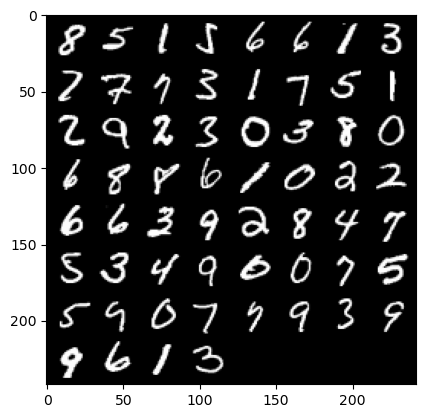

In [7]:
def imshow(img):
   npimg = img.numpy()
   plt.imshow(np.transpose(npimg, (1, 2, 0)))
   plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
labels
# show images
imshow(torchvision.utils.make_grid(images))


**3. Defining the CNN architecture**

  To solve the classification problem, we will leverage nn.Module class, PyTorch’s building block for intuitively creating sophisticated neural network architectures.

  In the code below, we create a class called CNN, which inherits the properties of nn.Module class. The CNN class will be the blueprint of a CNN with two convolutional layers, followed by a fully connected layer.

  In PyTorch, we use nn.Conv2d to define a convolutional layer. We pass it the number of input and output feature maps. We also set some of the parameters for the convolutional layer to work, including the kernel or filter size and padding.

  Next, we add a max pooling layer with nn.MaxPool2d. ​​In it, we slide a non-overlapping window over the output of the previous convolutional layer. At each position, we select the maximum value from the window to pass forward. This operation reduces the spatial dimensions of the feature maps, reducing the number of parameters and computational complexity in the network. Finally, we add a fully connected linear layer.

  The forward() function defines how the different layers are connected, adding several ReLU activation functions after each convolutional layer.

In [8]:
class CNN(nn.Module):
   def __init__(self, in_channels, num_classes):

       """
       Building blocks of convolutional neural network.

       Parameters:
           * in_channels: Number of channels in the input image (for grayscale images, 1)
           * num_classes: Number of classes to predict. In our problem, 10 (i.e digits from  0 to 9).
       """
       super(CNN, self).__init__()

       # 1st convolutional layer
       self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=3, padding=1)
       # Max pooling layer
       self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
       # 2nd convolutional layer
       self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
       # Fully connected layer
       self.fc1 = nn.Linear(16 * 7 * 7, num_classes)

   def forward(self, x):
       """
       Define the forward pass of the neural network.

       Parameters:
           x: Input tensor.

       Returns:
           torch.Tensor
               The output tensor after passing through the network.
       """
       x = F.relu(self.conv1(x))  # Apply first convolution and ReLU activation
       x = self.pool(x)           # Apply max pooling
       x = F.relu(self.conv2(x))  # Apply second convolution and ReLU activation
       x = self.pool(x)           # Apply max pooling
       x = x.reshape(x.shape[0], -1)  # Flatten the tensor
       x = self.fc1(x)            # Apply fully connected layer
       return x
       x = x.reshape(x.shape[0], -1)  # Flatten the tensor
       x = self.fc1(x)            # Apply fully connected layer
       return x

Once we have defined the CNN class, we can create our model and move it to the device where it will be trained and run.

Neural networks, including CNNs, show better performance when running on GPUs, but that may be the case on your computer. Therefore, we will run the model on a GPU only when available; otherwise, we will use a regular CPU.

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN(in_channels=1, num_classes=10).to(device)
print(model)


CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


**4. Training the CNN model**

  Now that we have our model, it’s time to train it. To do so, we first will need to determine how we will measure the performance of the model. Since we are dealing with a multi-class classification problem, we will use the cross-entropy loss function, available in PyTorch as nn.CrossEntropyLoss. We will also use Adam optimizer, one of the most popular optimization algorithms.

In [10]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs=10
losses = []
for epoch in range(num_epochs):
 # Iterate over training batches
   print(f"Epoch [{epoch + 1}/{num_epochs}]")

   for batch_index, (data, targets) in enumerate(tqdm(train_loader)):
       data = data.to(device)
       targets = targets.to(device)
       scores = model(data)
       loss = criterion(scores, targets)
       losses.append(loss.item())
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

Epoch [1/10]


100%|██████████| 1000/1000 [00:10<00:00, 91.71it/s]


Epoch [2/10]


100%|██████████| 1000/1000 [00:10<00:00, 93.39it/s]


Epoch [3/10]


100%|██████████| 1000/1000 [00:10<00:00, 92.26it/s]


Epoch [4/10]


100%|██████████| 1000/1000 [00:10<00:00, 94.79it/s]


Epoch [5/10]


100%|██████████| 1000/1000 [00:10<00:00, 91.72it/s]


Epoch [6/10]


100%|██████████| 1000/1000 [00:10<00:00, 91.35it/s]


Epoch [7/10]


100%|██████████| 1000/1000 [00:11<00:00, 86.13it/s]


Epoch [8/10]


100%|██████████| 1000/1000 [00:11<00:00, 88.57it/s]


Epoch [9/10]


100%|██████████| 1000/1000 [00:11<00:00, 89.09it/s]


Epoch [10/10]


100%|██████████| 1000/1000 [00:11<00:00, 87.02it/s]


Check the training loss.

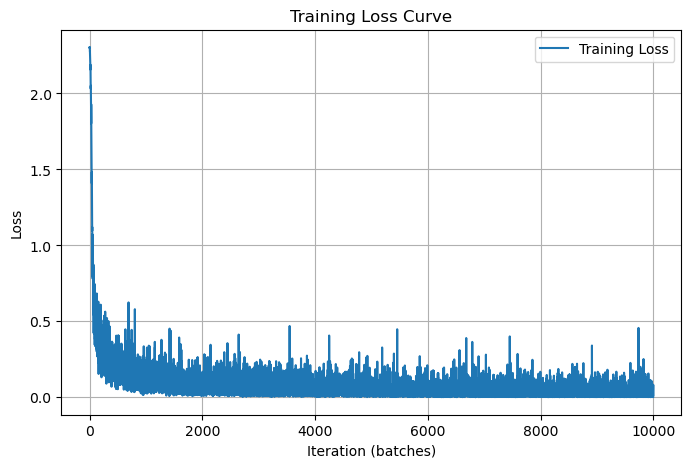

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(losses, label="Training Loss")
plt.xlabel("Iteration (batches)")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()


**5. Evaluating the model**

  Once the model is trained, we can evaluate its performance on the test dataset. We will use accuracy, a popular metric for classification problems. We got a 0.98 accuracy score, which means that our model correctly classified 98% of the digits. Not bad!

In [12]:
# Set up of multiclass accuracy metric
from torchmetrics.classification import Accuracy, Precision, Recall

acc = Accuracy(task="multiclass",num_classes=10)
precision = Precision(task="multiclass", average="macro", num_classes=10)
recall = Recall(task="multiclass", average="macro", num_classes=10)

# Iterate over the dataset batches
model.eval()
with torch.no_grad():
   for images, labels in test_loader:
       # Get predicted probabilities for test data batch
       outputs = model(images)
       _, preds = torch.max(outputs, 1)
       acc(preds, labels)
       precision(preds, labels)
       recall(preds, labels)

#Compute total test accuracy
test_accuracy = acc.compute()
test_precision = precision.compute()
test_recall = recall.compute()
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test precision: {test_precision:.4f}")
print(f"Test recall: {test_recall:.4f}")


Test accuracy: 0.9869
Test precision: 0.9868
Test recall: 0.9868


## Exercise 2. Try to change the CNN model, just like disassembling and assembling lego to see the effect of each part.

1. Try to change the size and the number of filters.
2. Try another activation functions.
3. Try to remove the max pooling or change it to average pooling.

Describe how the accuracy changes by doing these manipulations and why.

## Exercise 3. Think about why we need convolutions (instead of just using fully connected layers)?

  Please write your answers here.

# Section 8. Motivation of CORnet


**Motivation of [CORnet](https://www.biorxiv.org/content/10.1101/408385v1.full.pdf):**

  Deep artificial neural networks with spatially repeated processing (aka, deep convolutional ANNs) have been established as the best class of candidate models of visual processing in primate ventral visual processing stream. Over the past five years, these ANNs have evolved from a simple feedforward eight-layer architecture in AlexNet to extremely deep and branching NASNet architectures, demonstrating increasingly better object categorization performance and increasingly better explanatory power of both neural and behavioral responses.

  However, from the neuroscientist's point of view, the relationship between such very deep architectures and the ventral visual pathway is incomplete in at least two ways. On one hand, current state-of-the-art ANNs appear to be **too complex** (e.g. now over 100 levels) compared with the relatively shallow cortical hierarchy (4-8 levels), which makes it difficult to map their elements to those in the ventral visual stream and makes it difficult to understand what they are doing. On the other hand, current state-of-the-art ANNs appear to be not complex enough in that they **lack recurrent connections** and the resulting neural response dynamics that are commonplace in the ventral visual stream. A "CORnet" family of deep neural network architectures resolves both of these issues by developing.
  
  Rather than just seeking high object recognition performance (as the state-of-the-art ANNs above), they instead try to <u>reduce the model family to its most important elements (CORnet-Z)</u> and then gradually build new ANNs with recurrent and skip connections while monitoring both performance and the match between each new CORnet model and a large body of primate brain and behavioral data. The authors report here that their <u>current best ANN model derived from this approach (CORnet-S)</u> is among the top models on Brain-Score, a composite benchmark for comparing models to the brain, but is simpler than other deep ANNs in terms of the number of convolutions performed along the longest path of information processing in the model.

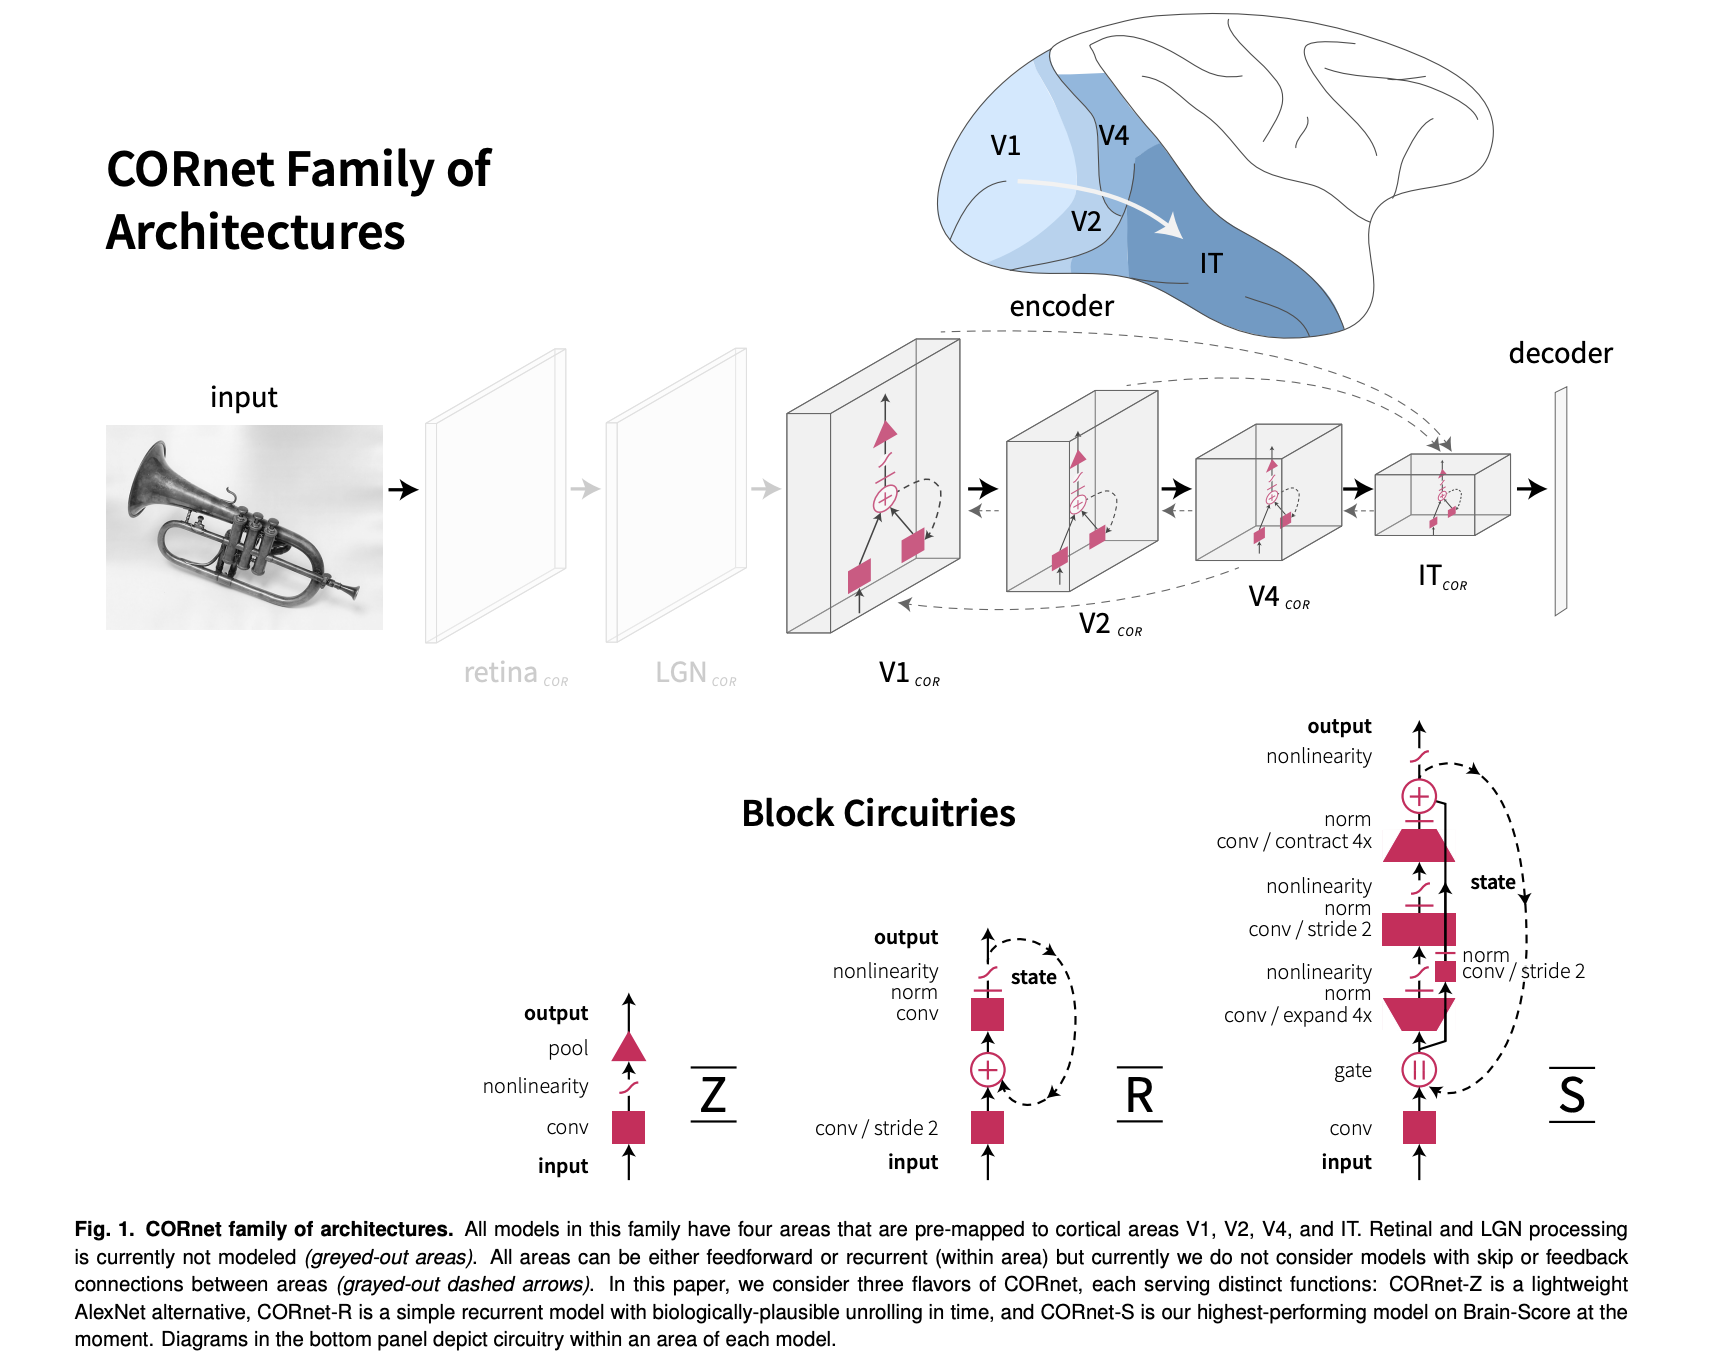

**Important Notice:** The CORnet is designed for modeling the ventral visual processing stream (V1 -> V2 -> V4 -> IT) in monkey. (The visual processing stream in mouse is largely different from monkey) Because, we
have no strong reason to believe that circuitry should
be different across areas in the ventral visual pathway, the operations and
connectivity in each model area are the same.

# Section 9. The simpliest CORnet: CORnet-Z

CORnet-Z (a.k.a. "Zero") is the simpliest version of CORnet with comparable predictivity of neural response. CORnet-Z’s area circuits consist of only a single convolution, followed by a ReLU nonlinearity and max
pooling (See Fig.1 in Section 8).

In [20]:
# ----------------  Helper modules: ---------------

# class Identity(nn.Module):

#     """
#     Helper module that stores the current tensor. Useful for accessing by name
#     """

#     def forward(self, x):
#         return x

# class Flatten(nn.Module):

#     """
#     Helper module for flattening input tensor to 1-D for the use in Linear modules
#     """

#     def forward(self, x):
#         return x.view(x.size(0), -1)

# from collections import OrderedDict

The code of one CORnet-Z block is as follow:

In [ ]:
# you don't have to run this cell

class CORblock_Z(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size,
                              stride=stride, padding=kernel_size // 2)
        self.nonlin = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.output = Identity()  # for an easy access to this block's output

    def forward(self, inp):
        x = self.conv(inp)
        x = self.nonlin(x)
        x = self.pool(x)
        x = self.output(x)  # for an easy access to this block's output
        return x

The whole CORnet-Z archetecture is:

In [ ]:
# you don't have to run this cell

def CORnet_Z():
    model = nn.Sequential(OrderedDict([
        ('V1', CORblock_Z(3, 64, kernel_size=7, stride=2)),
        ('V2', CORblock_Z(64, 128)),
        ('V4', CORblock_Z(128, 256)),
        ('IT', CORblock_Z(256, 512)),
        ('decoder', nn.Sequential(OrderedDict([
            ('avgpool', nn.AdaptiveAvgPool2d(1)),
            ('flatten', Flatten()),
            ('linear', nn.Linear(512, 1000)),
            ('output', Identity())
        ])))
    ]))

    # weight initialization
    for m in model.modules():
        if isinstance(m, (nn.Conv2d, nn.Linear)):
            nn.init.xavier_uniform_(m.weight)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.BatchNorm2d):
            m.weight.data.fill_(1)
            m.bias.data.zero_()

    return model

Since training CORnet from scratch takes a long time, our tutorial will directly use the already trained model provided in the article. 

Weights of the CORnet-Z pretrained on ImageNet will be automatically downloaded and restored by running the following code:

In [6]:
import cornet
CORnet_Z_model = cornet.cornet_z(pretrained=True, map_location=torch.device('cpu'))

In [7]:
# check all the modules of the CORnet-Z model
CORnet_Z_model.modules

<bound method Module.modules of DataParallel(
  (module): Sequential(
    (V1): CORblock_Z(
      (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
      (nonlin): ReLU(inplace=True)
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (output): Identity()
    )
    (V2): CORblock_Z(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (nonlin): ReLU(inplace=True)
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (output): Identity()
    )
    (V4): CORblock_Z(
      (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (nonlin): ReLU(inplace=True)
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (output): Identity()
    )
    (IT): CORblock_Z(
      (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (nonlin): ReLU(inplace=True)
      (pool)

If you want to train a CORnet yourself, you can refer to the following steps provied in the github link of CORnet:

1. You need one or two GPUs. 

2. Get ImageNet if you don't have it yet. If you do, note that validation images need to be put in separate folders, just like train data. Follow the instructions in that link to do so easily.

3. You are ready to train:
* CORnet-Z: python run.py train --model Z --workers 20 --ngpus 1 --step_size 10 --epochs 25 --lr .01 --data_path <path to imagenet> --output_path <path to saving trained model> (~20 hours)
* CORnet-RT: python run.py train --model RT --workers 20 --ngpus 2 --step_size 10 --epochs 25 --lr .1 --data_path <path to imagenet> --output_path <path to saving trained model>
* CORnet-S: python run.py train --model S --workers 20 --ngpus 2 --step_size 20 --epochs 43 --lr .1 --data_path <path to imagenet> --output_path <path to saving trained model> (several days)


# Section 10. THINGS Dataset of Spiking Activity

This is a data set for monkeys to see pictures in [THINGS](https://things-initiative.org/). We have organized the Normalized neural activity data and sent it to you. You can directly use the downloaded data. If you still care about the details of this data set, you can read the second tutorial of this class or read the original paper: [Papale P, Wang F, Self M W, et al. An extensive dataset of spiking activity to reveal the syntax of the ventral stream[J]. Neuron, 2025, 113(4): 539-553. e5.](https://www.cell.com/neuron/abstract/S0896-6273(24)00881-X?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS089662732400881X%3Fshowall%3Dtrue)


In [65]:
import os
normalizedDataPath = './THINGS_Data' # path of the normalized data, change to your own path
things_images_path = './THINGS_Data/selected_images' # path of the images, change to your own path
monkey_id = 'monkeyF'
train_norm_data = np.load(os.path.join(normalizedDataPath, f'{monkey_id}_train_MUA.npy'))
test_norm_data = np.load(os.path.join(normalizedDataPath, f'{monkey_id}_test_MUA.npy'))
test_norm_data_reps = np.load(os.path.join(normalizedDataPath, f'{monkey_id}_test_MUA_reps.npy'))
print('train normalize data shape (num_img, num_neuron): ', train_norm_data.shape) 
# All trian images has only one trial (only show once to the monkey)
print('test normalize data (repetition reserved) shape (num_reps, num_img, num_neuron): ', test_norm_data_reps.shape) 
# Test images has more than one trials (30 trials)
print('test normalize data shape (num_img, num_neuron): ', test_norm_data.shape) 
# test_norm_data averaged acorss trials

train normalize data shape (num_img, num_neuron):  (120, 1024)
test normalize data (repetition reserved) shape (num_reps, num_img, num_neuron):  (30, 50, 1024)
test normalize data shape (num_img, num_neuron):  (50, 1024)


In [66]:
# load unit table which contains unit information for each neuron
unit_table = pd.read_csv(os.path.join(normalizedDataPath, f'unit_table_{monkey_id}.csv'))
unit_table

,unit_id,array_id,region,mean_SNR,mean_latency,mean_reliability,oracle_correlation
0,0,0,V1,3.424278,18.75,0.209574,0.428947
1,1,0,V1,3.726187,19.50,0.223850,0.433227
2,2,0,V1,5.887569,18.75,0.575567,0.749390
3,3,0,V1,4.877667,17.75,0.398740,0.616069
4,4,0,V1,4.155510,16.25,0.204876,0.419431
...,...,...,...,...,...,...,...
1019,1019,15,V4,4.069612,31.00,0.823487,0.904077
1020,1020,15,V4,3.877016,30.50,0.844101,0.915828
1021,1021,15,V4,3.590074,31.25,0.833096,0.909606
1022,1022,15,V4,4.344573,39.75,0.775076,0.876014


In [67]:
# load stimlus table which contains stimulus information for each image
train_stim_table = pd.read_csv(os.path.join(normalizedDataPath, 'train_table_normalizedData.csv'))
test_stim_table = pd.read_csv(os.path.join(normalizedDataPath, 'test_table_normalizedData.csv'))
train_stim_table.head()

,stimulus_id,category,stimulus_name
0,0,altar,altar_01b.jpg
1,1,altar,altar_02s.jpg
2,2,altar,altar_03s.jpg
3,3,ashtray,ashtray_01s.jpg
4,4,ashtray,ashtray_02s.jpg


In [68]:
test_stim_table.head()

,stimulus_id,category,stimulus_name
0,0,quill,quill_15s.jpg
1,1,dress,dress_13s.jpg
2,2,bike,bike_14s.jpg
3,3,stalagmite,stalagmite_14s.jpg
4,4,horse,horse_17s.jpg


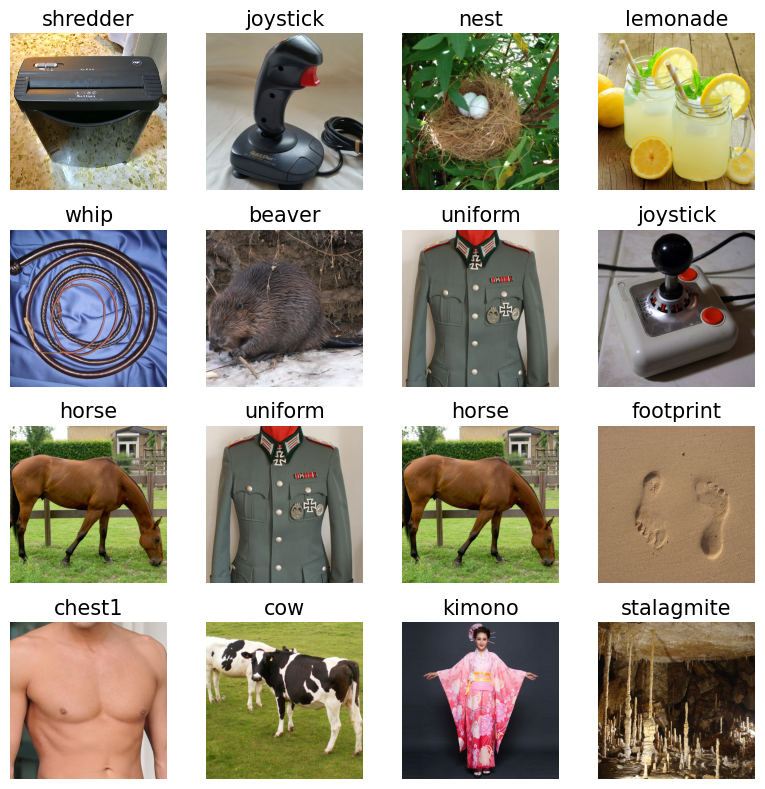

In [69]:
# show example images 
n_cols = 4; n_rows = 4
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))

for i in range(n_rows):
    for j in range(n_cols):
        ax = axs[i, j]
        img_id = np.random.randint(0, len(train_stim_table))
        img = plt.imread(os.path.join(things_images_path, train_stim_table.iloc[img_id]['category'], train_stim_table.iloc[img_id]['stimulus_name']))
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'{train_stim_table.iloc[img_id]["category"]}', fontsize=15)

plt.tight_layout()

# Section 11. Estimating the neural predicticity of CORnet-Z

In the article, CORnet-Z is considered to be a simple encoding model that may be similar to the real brain visual pathway. In this section we will introduce how to verify whether the model is really similar to the neural activity in the real brain?



A common method used to verify whether an encoding model is consistent with the real brain is to look at the ability of the encoding model's embedding to predict real neural activity. We can use a simple **Linear Regression** to predict the real brain neural activity from the embedding of the encoding model. The more the predicted neural activity is consistent with the real neural activity, the closer the encoding model is to the real brain.



There are different metrics for evaluating predicted neural activity against actual neural activity, such as R-squared, which measures whether predicted values and true values are completely consistent. However, due to the relatively large variability between different neurons and across different trials of the same neuron, using R-squared to evaluate results can be unstable. 

$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - y'_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

- $y_i$ is the ith real value 
- $y'_i$ is the ith predicted value 
- $\bar{y}$ is the mean of the real values 
- $n$ is the number of samples

Therefore, the simplest approach is to calculate the Pearson correlation between predicted values and true values to examine the correlation between the two variables, without focusing on the absolute magnitude and amplitude of changes.

$$r = \frac{\sum_{i=1}^{n}(y_i - \bar{y})(y'_i - \bar{y}')}{\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2 \sum_{i=1}^{n}(y'_i - \bar{y}')^2}}$$

- $\bar{y}$ is the mean of the real values 
- $\bar{y}'$ is the mean of the predicted values


Due to the inherent trial-to-trial variability in neural activity, neural responses differ across trials even under identical stimuli. However, the Pearson correlation coefficient treats all variability as "signal," therefore this variability needs to be considered when evaluating model performance. Schoppe et al. later proposed CCnorm, which estimates the portion of neural activity that is truly stimulus-driven through signal power (SP), excludes the influence of inherent noise, and obtains a "denoised" correlation coefficient for more fair model evaluation. If you want to learn more details about CCnorm, you can read this article: Schoppe, O. et al. (2016) "Measuring the Performance of Neural Models," Frontiers in Computational Neuroscience, 10. Available at: https://doi.org/10.3389/fncom.2016.00010.



$$CC_{norm} = \frac{\text{Cov}(y,\hat{y})}{\sqrt{SP \cdot \text{Var}(\hat{y})}}$$


In addition to CCnorm, there are numerous other metrics for measuring the consistency between encoding models and the real brain, which can be collectively referred to as Brain Score. Some Brain Score metrics consider not only the consistency of neural activity, but also the consistency between encoding models and actual human or animal behavior ([Kubilius et.al.](https://papers.nips.cc/paper_files/paper/2019/file/7813d1590d28a7dd372ad54b5d29d033-Paper.pdf)). If you want to learn more, you can refer to this website for further study: https://www.brain-score.org/tutorials/models/quickstart.



In [79]:
# -------------------- Helper functions --------------------------
from torch.utils.data import Dataset, DataLoader
from PIL import Image


class ImagePathDataset(Dataset):
    """Load images from a list of file paths."""
    def __init__(self, fnames, imsize=224):
        self.fnames = fnames
        self.transform = torchvision.transforms.Compose([
            torchvision.transforms.Resize((imsize, imsize)),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225]),
        ])

    def __len__(self):
        return len(self.fnames)

    def __getitem__(self, idx):
        fname = self.fnames[idx]
        try:
            im = Image.open(fname).convert('RGB')
        except:
            raise FileNotFoundError(f'Unable to load {fname}')
        im = self.transform(im)
        return im, fname



def extract_model_features(
    model, fnames, layer='decoder', sublayer='avgpool', imsize=224, batch_size=64, num_workers=0,
    output_path=None, device=None
):
    """
    Efficient feature extraction using PyTorch DataLoader.
    """
    # -------------------------------
    # Setup
    # -------------------------------
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f'device is : {device}')

    dataset = ImagePathDataset(fnames, imsize=imsize)
    loader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True
    )

    model = model.to(device).eval()
    try:
        m = model.module
    except AttributeError:
        m = model
    model_layer = getattr(getattr(m, layer), sublayer)

    holder = []
    def _store_feats(layer, inp, output):
        if isinstance(output, torch.Tensor) and output.ndim == 5:  # [B, T, C, H, W]
            holder.append(output.detach().cpu().numpy().reshape(len(output), output.shape[1], -1))
        else:
            holder.append(output.detach().cpu().numpy().reshape(len(output), -1))

    hook = model_layer.register_forward_hook(_store_feats)

    # -------------------------------
    # Forward pass through dataloader
    # -------------------------------
    all_feats = []
    with torch.no_grad():
        for imgs, _ in tqdm(loader, total=len(loader)):
            imgs = imgs.to(device, non_blocking=True)
            holder = []
            model(imgs)
            # concate batch features
            all_feats.append(np.concatenate(holder, axis=0))

    hook.remove()
    feats = np.concatenate(all_feats, axis=0)

    # -------------------------------
    # Optional: save
    # -------------------------------
    if output_path is not None:
        os.makedirs(output_path, exist_ok=True)
        fname = f'CORnet_{layer}_{sublayer}_feats.npy'
        np.save(os.path.join(output_path, fname), feats)

    return feats


# Ref: https://github.com/OSchoppe/CCnorm

def CCnorm(R, yhat, minSP=0.002, Verbose=False):
    # function [CCnorm, CCabs, CCmax] = calc_CCnorm(R,yhat)
    #
    # This function returns the absolute correlation coefficient CCabs and the
    # normalized correlation coefficient CCnorm. The normalization discounts
    # the inherent inter-trial variability of the neural data provided in R.
    #
    # Inputs:
    #
    # R		should be a NxT matrix (N: number of trials, T: number of time
    #       bins) in which each row is the spike train of a given trial. Each
    #       element R(n,t) thus contains the number of spikes that were
    #       recorded during time bin t in trial n.
    #
    # yhat	should be a vector with T elements. It contains the predicted
    #       firing rate over time.
    # Check inputs
    (N, T) = R.shape
    assert T > N, 'Please provide R as a NxT matrix.'
    assert len(yhat) == T, 'The prediction yhat should have as many time bins as R.'
    yhat =  yhat.ravel()
    y = np.nanmean(R, axis=0)

    # Precalculate basic values for efficiency
    Ey = np.nanmean(y)							    # E[y]
    Eyhat = np.nanmean(yhat)						# E[yhat]
    Vy = np.nansum((y-Ey)**2)/T			        # Var(y)
    Vyhat = np.nansum((yhat-Eyhat)**2)/T           # Var(yhat)
    Cyyhat = np.nansum((y-Ey) * (yhat-Eyhat))/T    # Cov(y,yhat)

    # Calculate signal power (see []1)
    SP = (np.nanvar(np.nansum(R, axis=0))-np.nansum(np.nanvar(R, axis=1)))/(N*(N-1))
    if SP <= 0:
        negSP = True
    else:
        negSP = False

    SP = np.maximum(SP, minSP)

    # Calculate CC values
    CC_abs = Cyyhat/np.sqrt(Vy*Vyhat) # pearson correlation coefficient
    CC_norm = Cyyhat/np.sqrt(SP*Vyhat) # normalized correlation coefficient
    CC_max = np.sqrt(SP/Vy)

    
    if negSP:
        if Verbose:
            print('Signal power estimate is negative or zero, so CCmax and CCnorm')
            print('cannot be calculated. This happens if the neural data is very')
            print('noisy, i.e. not driven by the stimulus at all.')
        CC_norm = np.nan
        CC_max = 0

    return (CC_norm, CC_abs, CC_max, SP)

def R_square(Ytrue_test, Yhat_test):
    mean_y_true = Ytrue_test.mean()
    return 1 - (np.sum((Ytrue_test - Yhat_test)** 2)/ np.sum((Ytrue_test - mean_y_true)** 2))

## 1. Get real neural response in specific brain region

First, we can obtain the real neural activity of monkey F for each image from the dataset, here we take the neural activity of IT as an example

In [71]:
region = 'IT' 
NeuIdx = np.where((unit_table['region'] == region))[0]
RespTrain = train_norm_data[:, NeuIdx]
RespTest = test_norm_data[:, NeuIdx]
RespTestReps = test_norm_data_reps[:, :, NeuIdx]
RespTrain.shape, RespTest.shape, RespTestReps.shape

((120, 320), (50, 320), (30, 50, 320))

## 2. Get CORnet-Z model features/embedding in the same module

Subsequently, we input the same images to the CORnet-Z model and obtain the output of the IT module in the model as the “neural activity” of the model



In [72]:
trainImgNames = [os.path.join(things_images_path, train_stim_table.iloc[i]['category'], train_stim_table.iloc[i]['stimulus_name']) for i in range(len(train_stim_table))]
testImgNames = [os.path.join(things_images_path, test_stim_table.iloc[i]['category'], test_stim_table.iloc[i]['stimulus_name']) for i in range(len(test_stim_table))]

train_feats = extract_model_features(
    CORnet_Z_model,
    trainImgNames,
    layer='IT', sublayer='output', # choose output region as example
    batch_size=256, num_workers=0,
    output_path=None
)

test_feats = extract_model_features(
    CORnet_Z_model,
    testImgNames,
    layer='IT', sublayer='output', # choose output region as example
    batch_size=256, num_workers=0,
    output_path=None
)

device is : cpu


  0%|          | 0/1 [00:00<?, ?it/s]/opt/miniconda3/lib/python3.13/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
100%|██████████| 1/1 [00:03<00:00,  3.82s/it]


device is : cpu


100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


## 3. Train a linear mapping from model features to neural responses using linear regression

In [122]:
from sklearn.linear_model import LinearRegression

X_train = train_feats
Y_train = RespTrain

model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

Yhat_test = model_lr.predict(test_feats)
Yhat_train = model_lr.predict(X_train)

## 4. Compute neural predictivity of the CORnet-Z features on test set using CCnorm

In [125]:
n_neurons = RespTest.shape[1]
ccnorm = np.zeros(n_neurons)
for i in range(n_neurons):
    r = RespTestReps[:, :, i]  # shape (num_reps, num_img)
    yhat = Yhat_test[:, i]       # shape (num_img,)
    ccnorm[i], _, _, _ = CCnorm(r, yhat, minSP=0.002, Verbose=False)

Text(0.5, 0, 'CCnorm')

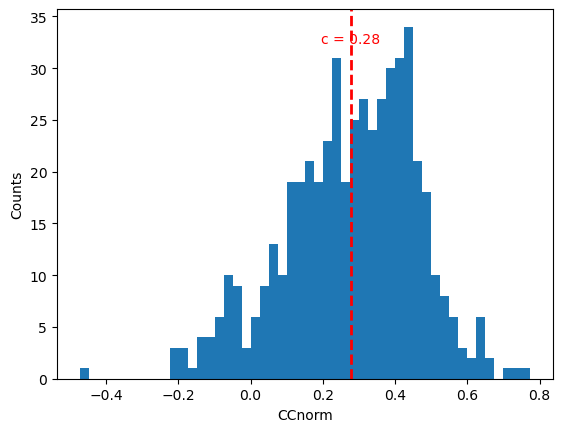

In [126]:
plt.figure()
plt.hist(ccnorm, bins=50)
mean_val = np.nanmean(ccnorm)
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')
plt.text(mean_val, plt.ylim()[1]*0.9, f'c = {mean_val:.2f}', color='red',
         ha='center', va='bottom', fontsize=10, rotation=0)
plt.ylabel('Counts')
plt.xlabel('CCnorm')

## Exercise 5. Try other brain regions and model layers

device is : cpu


  0%|          | 0/1 [00:00<?, ?it/s]/opt/miniconda3/lib/python3.13/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
100%|██████████| 1/1 [00:03<00:00,  3.78s/it]


device is : cpu


100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


device is : cpu


  0%|          | 0/1 [00:00<?, ?it/s]/opt/miniconda3/lib/python3.13/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
100%|██████████| 1/1 [00:03<00:00,  3.96s/it]


device is : cpu


100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


device is : cpu


  0%|          | 0/1 [00:00<?, ?it/s]/opt/miniconda3/lib/python3.13/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
100%|██████████| 1/1 [00:03<00:00,  3.74s/it]


device is : cpu


100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


device is : cpu


  0%|          | 0/1 [00:00<?, ?it/s]/opt/miniconda3/lib/python3.13/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
100%|██████████| 1/1 [00:03<00:00,  3.71s/it]


device is : cpu


100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


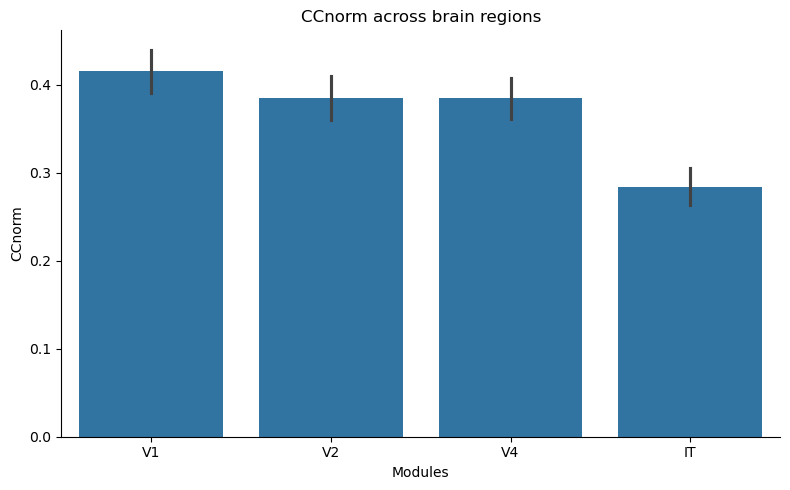

In [ ]:
true_region = ..... #  select a region ！！！！！
NeuIdx = np.where((unit_table['region'] == true_region))[0]
RespTrain = train_norm_data[:, NeuIdx]
RespTest = test_norm_data[:, NeuIdx]
RespTestReps = test_norm_data_reps[:, :, NeuIdx]
RespTrain.shape, RespTest.shape, RespTestReps.shape


CCnorm_different_model_modules = {}

for region in ['V1', 'V2', 'V4', 'IT']:
    
    train_feats = extract_model_features(
        CORnet_Z_model,
        trainImgNames,
        layer=region, sublayer= ...... , # select layer
        batch_size=256, num_workers=0,
        output_path=None
    )

    test_feats = extract_model_features(
        CORnet_Z_model,
        testImgNames,
        layer=region, sublayer= ...... , #  select a layer ！！！！！
        batch_size=256, num_workers=0,
        output_path=None
    )

    X = train_feats
    Y = RespTrain

    model_lr = LinearRegression()
    model_lr.fit(X, Y)
    Yhat_test = model_lr.predict(test_feats)

    ccnorm = np.zeros(n_neurons)
    for i in range(n_neurons):
        r = RespTestReps[:, :, i]  # shape (num_reps, num_img)
        yhat = Yhat_test[:, i]       # shape (num_img,)
        ccnorm[i], _, _, _ = CCnorm(r, yhat, minSP=0.002, Verbose=False)
    
    CCnorm_different_model_modules[region] = ccnorm


import seaborn as sns

df = pd.DataFrame([
    {'Modules': region, 'CCnorm': value}
    for region, values in CCnorm_different_model_modules.items()
    for value in values
])

# 绘制 violin plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Modules', y='CCnorm')#, inner='box', cut=0)
sns.despine()
plt.title(f'Brain region: {true_region}')
plt.tight_layout()
plt.show()

## Exercise 6（Optional）. Try CORnet-R or CORnet-S 

## Exercise 7（Optional）. Discuss your opinions about CORnet.

Read the paper, try the code and discuss your opinions on the CORnet. What are the benefits? What applications it can drive? What else could be improved?

## Exercise 8（Optional）. What do you think about the tradeoffs in designing models for effectiveness and similarity to the biological brain?

Please write your answers here！

# References

The content of this tutorial mainly comes from the modification of these references:




1. Neuromatch Academy [W2D2_Tutorial](https://deeplearning.neuromatch.io/tutorials/W2D2_ConvnetsAndDlThinking/student/W2D2_Tutorial1.html)

2. [PyTorch CNN Tutorial: Build and Train Convolutional Neural Networks in Python](https://www.datacamp.com/tutorial/pytorch-cnn-tutorial)

3. [CORnet: Modeling the Neural Mechanisms of Core Object Recognition](https://github.com/dicarlolab/CORnet?tab=readme-ov-file#longer-motivation)
